In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Excercise 1 -  Generated Quantities Block

In [3]:
# Here I create the lenghts of first name and last name
F = len("Filip")
L = len("Wójtowicz")

In [4]:
gen_quant = CmdStanModel(stan_file='code_1.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [5]:
samples = gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [9]:
df = samples.draws_pd()  # Creates Pandas Dataframe
df.head()

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5]
0,0.0,0.0,202.4290,205.0,206.0,205.0,208.0,203.0
1,0.0,0.0,39.3950,40.0,44.0,37.0,32.0,44.0
2,0.0,0.0,40.3214,57.0,52.0,42.0,36.0,38.0
3,0.0,0.0,16.6443,23.0,16.0,13.0,13.0,22.0
4,0.0,0.0,85.0023,77.0,95.0,74.0,84.0,78.0


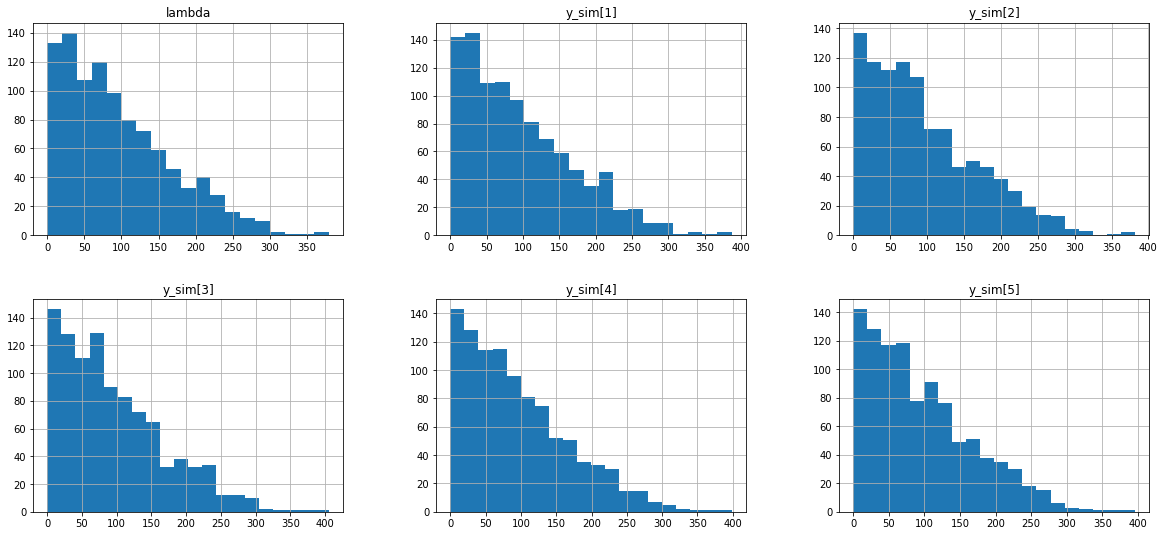

In [29]:
df_new.hist(layout=(2, 3), bins='auto', figsize=(20, 9))
plt.show()

# fig, ax = plt.subplots(3, 2, figsize = (20, 9))  # different approach of plotting

# df_new = df.iloc[:, 2:]

# for ax in ax.flatten():
#     df_new.hist(ax=ax, bins='auto')
# plt.show()

## Excercise 2 - Constraints on the data 

In [20]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [21]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:compiling stan file /home/Volume_for_docker/code_3.stan to exe file /home/Volume_for_docker/code_3
INFO:cmdstanpy:compiled model executable: /home/Volume_for_docker/code_3
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/Volume_for_docker/code_3.hpp /home/Volume_for_docker/code_3.stan
Warning in '/home/Volume_for_docker/code_3.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundial


INFO:cmdstanpy:CmdStan done processing.


On both pieces of code, there is no option to set the parameters higher than 1, because of constraints.

## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [30]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


INFO:cmdstanpy:compiling stan file /home/Volume_for_docker/code_4.stan to exe file /home/Volume_for_docker/code_4
INFO:cmdstanpy:compiled model executable: /home/Volume_for_docker/code_4
INFO:cmdstanpy:created output directory: /home/Volume_for_docker/samples
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:03 Iteration: 6900 / 7000 [ 98%]  (Sampling)







































































chain 1 |██████████| 00:07 Sampling completed                       
chain 2 |██████████| 00:07 Sampling completed                       
chain 3 |██████████| 00:07 Sampling completed                       
chain 4 |██████████| 00:07 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/Volume_for_docker/samples/code_4-20230322224654_1.csv, /home/Volume_for_docker/samples/code_4-20230322224654_2.csv, /home/Volume_for_docker/samples/code_4-20230322224654_3.csv, /home/Volume_for_docker/samples/code_4-20230322224654_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

9489 of 24000 (39.54%) transitions ended with a divergence. These divergent transitions indicate that HMC is not fully able to explore the posterior distribution

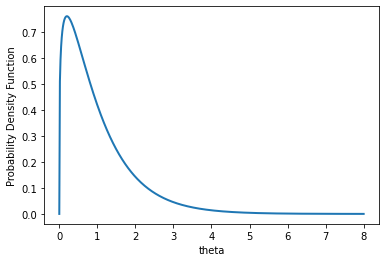

In [31]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()


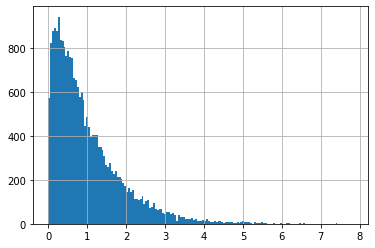

In [49]:
df_gamma1 = out_gamma1.draws_pd()
df_gamma1['theta'].hist(bins=160)
plt.show()

### Constrained parameter

In [35]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:compiling stan file /home/Volume_for_docker/code_5.stan to exe file /home/Volume_for_docker/code_5
INFO:cmdstanpy:compiled model executable: /home/Volume_for_docker/code_5
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:03 Iteration: 6900 / 7000 [ 98%]  (Sampling)










































































chain 1 |██████████| 00:07 Sampling completed                       
chain 2 |██████████| 00:07 Sampling completed                       
chain 3 |██████████| 00:07 Sampling completed                       
chain 4 |██████████| 00:07 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/Volume_for_docker/samples/code_5-20230322225503_1.csv, /home/Volume_for_docker/samples/code_5-20230322225503_2.csv, /home/Volume_for_docker/samples/code_5-20230322225503_3.csv, /home/Volume_for_docker/samples/code_5-20230322225503_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

2 of 24000 (0.01%) transitions ended with a divergence. There we got better results with constarins.

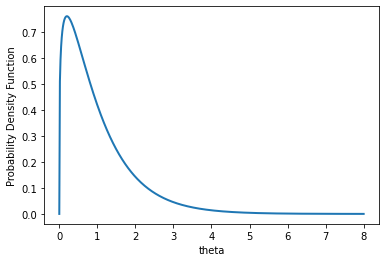

In [36]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

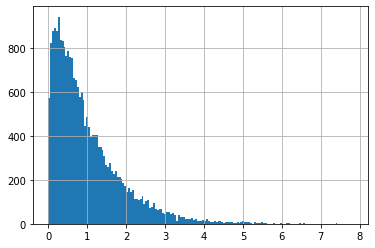

In [50]:
df_gamma2 = out_gamma1.draws_pd()
df_gamma2['theta'].hist(bins=160)
plt.show()

## Excercise 4 -  Selection of parameters using equation solving



In [40]:
model_tune = CmdStanModel(stan_file='code_6.stan')

F = F
L = L
y0 = 1  # initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

tunes.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma
0,0.0,0.0,2.71757


The standard deviation equals 2.71757.

## Excercise 5 - different methods of defining models


In [45]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 30082000  #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)



INFO:cmdstanpy:compiling stan file /home/Volume_for_docker/code_7.stan to exe file /home/Volume_for_docker/code_7
INFO:cmdstanpy:compiled model executable: /home/Volume_for_docker/code_7
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/Volume_for_docker/code_7.hpp /home/Volume_for_docker/code_7.stan
Warning in '/home/Volume_for_docker/code_7.stan', line 6, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundial

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


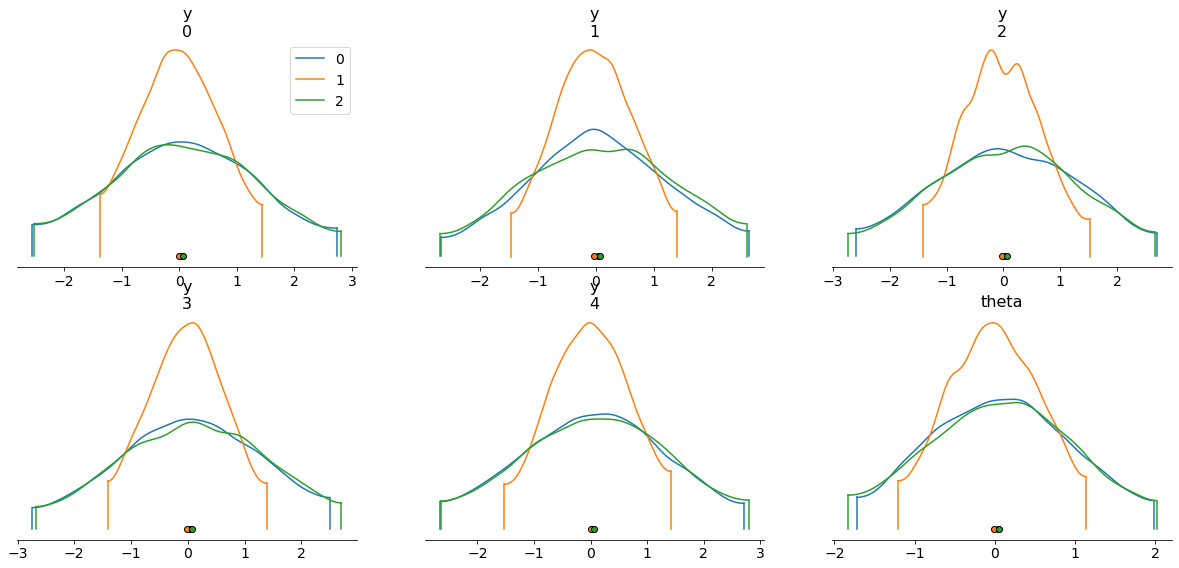

In [46]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

INFO:cmdstanpy:compiling stan file /home/Volume_for_docker/code_10.stan to exe file /home/Volume_for_docker/code_10
INFO:cmdstanpy:compiled model executable: /home/Volume_for_docker/code_10
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/Volume_for_docker/code_10.hpp /home/Volume_for_docker/code_10.stan
Warning in '/home/Volume_for_docker/code_10.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/s

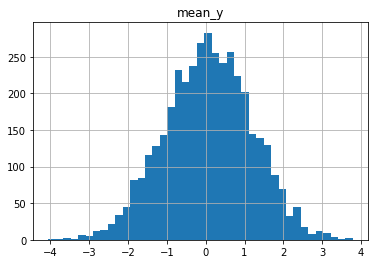

In [47]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_3)
# investigate the output and plot histogram of mean_y variable

df_mean_of_y = mean_of_y.draws_pd()
df_mean_of_y.hist(bins='auto')
plt.show()

**Summary:**


All exercises have been successfully done. I have learned how to use STAN and tried some useful properties, that it provides, such as creating statistical models.